In [80]:
import matplotlib.pyplot as plt
import random

import numpy as np
np.random.seed(1)

In [81]:

class Network(object):

    def __init__(self, sizes, lr, iterations = 500):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]
        self.lr = lr
        self.iteration = iterations

    def predict(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a
        
    def train(self, inputs, traindata):
        for _ in range(self.iteration):
            nabla_b, nabla_w = self.backprop(inputs, traindata)
            nabla_b = np.array(nabla_b)
            nabla_w = np.array(nabla_w)
            self.weights = self.weights - (self.lr * nabla_w)
            self.biases = self.biases - (self.lr * nabla_b)

    def backprop(self, x, y):

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
            
            
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)
    

    def evaluate(self, test_data):
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

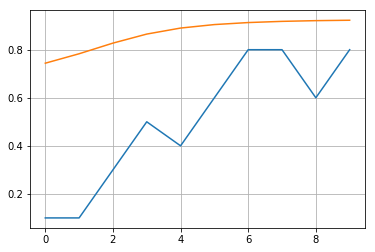

In [82]:
DATA = [[0, 0.1], [1, 0.1], [2, 0.3], [3, 0.5], [4, 0.4], [5, 0.6], [6, 0.8], [7, 0.8], [8, 0.6], [9, 0.8]]
DATA = np.array(DATA)
nn = Network([1, 20, 20, 1], 0.1)
NNDATA = np.array([nn.predict(x) for x in DATA[:, 0]])

plt.plot(DATA[:, 0], DATA[:, 1])
plt.plot(DATA[:, 0], NNDATA[:, 0])
plt.grid()
plt.show()

In [83]:
ANIMDATA = []
for _ in range(1000):
    for item in DATA:
        x = np.array([item[0]], ndmin=2).T
        y = np.array([item[1]], ndmin=2).T
        nabla_b, nabla_w = nn.backprop(x, y)
        nabla_b = np.array(nabla_b)
        nabla_w = np.array(nabla_w)
        nn.weights -= 0.01 * nabla_w
        nn.biases -= 0.01 * nabla_b
    ANIMDATA.append(np.array([[x, nn.predict(x)] for x in DATA[:, 0]]))

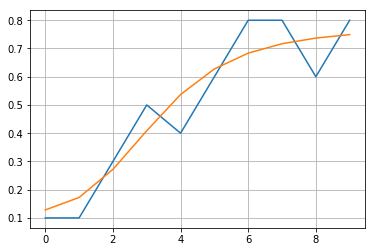

In [84]:
NNDATA = np.array([nn.predict(x) for x in DATA[:, 0]])

plt.plot(DATA[:, 0], DATA[:, 1])
plt.plot(DATA[:, 0], NNDATA[:, 0])
plt.grid()
plt.show()

<hr>

In [85]:
for i in ANIMDATA:
    print(i)
    print()

[[ 0.          0.73227928]
 [ 1.          0.77184144]
 [ 2.          0.81756713]
 [ 3.          0.85689621]
 [ 4.          0.88326921]
 [ 5.          0.8986645 ]
 [ 6.          0.90758374]
 [ 7.          0.91290977]
 [ 8.          0.91610911]
 [ 9.          0.91792983]]

[[ 0.          0.72014768]
 [ 1.          0.75989984]
 [ 2.          0.80704294]
 [ 3.          0.84814634]
 [ 4.          0.87594974]
 [ 5.          0.89227931]
 [ 6.          0.90178402]
 [ 7.          0.90748398]
 [ 8.          0.91092428]
 [ 9.          0.91289511]]

[[ 0.          0.70745103]
 [ 1.          0.74729598]
 [ 2.          0.79584351]
 [ 3.          0.83877438]
 [ 4.          0.86807824]
 [ 5.          0.88539832]
 [ 6.          0.89552763]
 [ 7.          0.90162821]
 [ 8.          0.9053276 ]
 [ 9.          0.90746048]]

[[ 0.          0.69421111]
 [ 1.          0.73404109]
 [ 2.          0.78396517]
 [ 3.          0.82876581]
 [ 4.          0.85963545]
 [ 5.          0.87800095]
 [ 6.          0.88879


[[ 0.          0.3223837 ]
 [ 1.          0.34105416]
 [ 2.          0.39848438]
 [ 3.          0.47236167]
 [ 4.          0.53850808]
 [ 5.          0.58632539]
 [ 6.          0.61845304]
 [ 7.          0.63988184]
 [ 8.          0.65411618]
 [ 9.          0.66326774]]

[[ 0.          0.32073787]
 [ 1.          0.33954407]
 [ 2.          0.39715827]
 [ 3.          0.47127549]
 [ 4.          0.5376844 ]
 [ 5.          0.5857298 ]
 [ 6.          0.61803134]
 [ 7.          0.63958725]
 [ 8.          0.65391383]
 [ 9.          0.66313226]]

[[ 0.          0.31915112]
 [ 1.          0.3380986 ]
 [ 2.          0.39590151]
 [ 3.          0.4702609 ]
 [ 4.          0.5369315 ]
 [ 5.          0.58520258]
 [ 6.          0.61767532]
 [ 7.          0.6393559 ]
 [ 8.          0.65377265]
 [ 9.          0.66305628]]

[[ 0.          0.31761888]
 [ 1.          0.33671249]
 [ 2.          0.39470825]
 [ 3.          0.46931176]
 [ 4.          0.53624319]
 [ 5.          0.58473761]
 [ 6.          0.6173

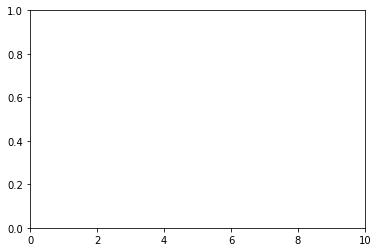

In [86]:
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, 10))
ax.set_ylim((0, 1))

line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = ANIMDATA[i][:, 0]
    y = ANIMDATA[i][:, 1]
    line.set_data(x, y)
    line2.set_data(DATA[:, 0], DATA[:, 1])
    
    return (line,line2)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [87]:
HTML(anim.to_jshtml())